Susceptible-Exposed-Infectious-Removed [SEIR]
* Baseline Model
β - transmission rate = R0 * γ
γ - 1/ infectious period
σ - 1/ incubation period
R0 - β/γ

** baseline parameters incubation period = 1/4
                       infectious period = 1/6
                       R0 = 3
                       so β = 0.5

# Flows
S -> E (infection)
E -> I (incubation ends)
I -> R (recovery/removal)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
N = 1_000_000

# defining parameters
sigma= 1 / 4.0
gamma= 1 / 6.0
R0 = 3.0
beta = R0 * gamma

In [8]:
# SEIR ODE system

def seir_ode(t, y):
    S, E, I, R = y

    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I

    return [dSdt, dEdt, dIdt, dRdt]

In [9]:
# initial conditions

y0 = [
    N - 10,     #S
    0,          #E
    10,         #I
    0           #R
]

In [10]:
# defining time frame
t_span = (0, 180)
t_eval = np.linspace(0, 180, 1800)

In [11]:
# Ordinary differential equation (ODE)

solution = solve_ivp(
    seir_ode,
    t_span,
    y0,
    t_eval= t_eval
)

S, E, I, R = solution.y

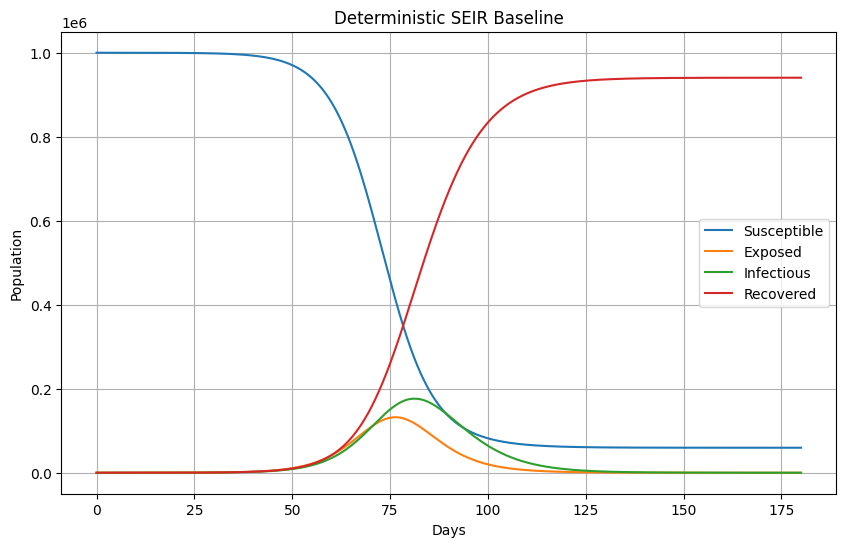

: 

In [ ]:
# Plot

plt.figure(figsize= (10, 6))
plt.plot(t_eval, S, label = "Susceptible")
plt.plot(t_eval, E, label = "Exposed")
plt.plot(t_eval, I, label = "Infectious")
plt.plot(t_eval, R, label = "Recovered")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("Deterministic SEIR Baseline")
plt.legend()
plt.grid(True)
plt.show()